In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
mnist=keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

# Data Exploration

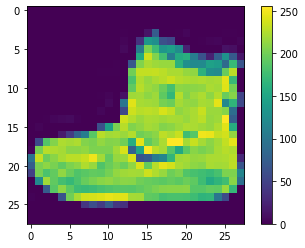

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [15]:
y_train[0]

9

In [16]:
X_train=X_train/255.0

In [17]:
X_test=X_test/255.0

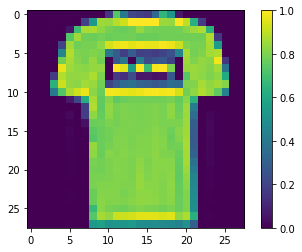

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# Build model with Tensorflow 2.0

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [20]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#flatten data into 1D to give input
model.add(Dense(128, activation ='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model compilation
-Loss Function
-Optimizer
-Metrics

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5017 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8646: 0s - loss: 0.3801 
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3356 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3136 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2937 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.2656 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.2561 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2456 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2

In [23]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)

313/313 [==============================] - 0s 984us/step - loss: 0.3350 - accuracy: 0.8800
0.8799999952316284


In [24]:
from sklearn.metrics import accuracy_score


In [25]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
accuracy_score(y_test,y_pred)

0.88

In [27]:
pred=model.predict(X_test)

In [28]:
pred

array([[7.79143136e-07, 1.33218644e-11, 1.37472767e-09, ...,
        1.29047036e-02, 1.23248788e-06, 9.86927450e-01],
       [1.27584077e-04, 3.20749287e-14, 9.97972548e-01, ...,
        4.53648161e-11, 3.93928917e-11, 1.24664032e-13],
       [4.94265132e-12, 1.00000000e+00, 9.63773400e-15, ...,
        2.86107456e-22, 2.24009216e-18, 1.11560815e-19],
       ...,
       [3.77709890e-04, 4.66944137e-08, 2.57426349e-04, ...,
        1.98619099e-09, 9.99025106e-01, 2.05339912e-12],
       [4.08469214e-09, 9.99997735e-01, 2.58075561e-10, ...,
        1.18868880e-12, 1.80695574e-12, 1.59444596e-10],
       [7.75619719e-06, 4.47486244e-08, 2.13810677e-06, ...,
        1.80613669e-03, 3.71186761e-05, 6.32707361e-06]], dtype=float32)

In [29]:
pred[0]

array([7.79143136e-07, 1.33218644e-11, 1.37472767e-09, 2.51042342e-09,
       1.74673040e-10, 1.65581660e-04, 2.54418296e-07, 1.29047036e-02,
       1.23248788e-06, 9.86927450e-01], dtype=float32)

In [30]:
np.argmax(pred[0])# predict the index which has higher value

9